<a href="https://colab.research.google.com/github/smlra-kjsce/Cyber-ML-DL-101/blob/master/PyTorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Tutorial
<ol>
<li><a href="https://pytorch.org/">What is PyTorch?</a></li>
<li><a href="https://pytorch.org/tutorials/">What can we do with it?</a></li>
<li><a href="https://www.google.com/url?sa=i&source=imgres&cd=&cad=rja&uact=8&ved=2ahUKEwjBsLzk6LTkAhXFfn0KHeZRApgQjRx6BAgBEAQ&url=https%3A%2F%2Fblog.algorithmia.com%2Fexploring-the-deep-learning-framework-pytorch%2F&psig=AOvVaw3eLYpoGyGHRVB5KUBSwjIN&ust=1567605789915136">What is a Computation Graph?</a></li>
<li>Looking at a detailed example of PyTorch Graph.</li>  
</ol>

##Installing PyTorch

In [0]:
!pip3 install torch torchvision torchviz

     |████████████████████████████████| 51kB 3.8MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=703304b26e73788aaa8fb98f3bde18ac7d54b43e4de40d31fc380d4abd3bcaa1
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


##Importing all Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable
from math import pi
from copy import deepcopy

##Making Data
##Formula: mx + b + A1sin(w1x+c1) + A2sin(w2x+c2)

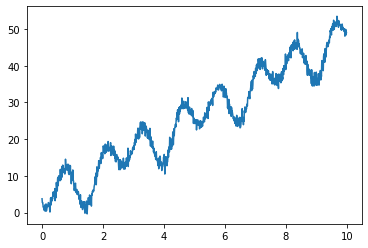

In [0]:
x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin( 2.5 * x + pi/3) - 5.2 * np.sin(5 * x + pi/5) + np.random.normal(size=1000)


plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

##How to compute a function in PyTorch


In [0]:
m = Variable(torch.tensor(1.2,dtype=torch.double),requires_grad=True)
b = Variable(torch.tensor(2.8,dtype=torch.double),requires_grad=True)
A1 = Variable(torch.tensor(0.6,dtype=torch.double),requires_grad=True)
w1 = Variable(torch.tensor(2.2,dtype=torch.double),requires_grad=True)
c1 = Variable(torch.tensor(pi/4,dtype=torch.double),requires_grad=True)
A2 = Variable(torch.tensor(-1.0,dtype=torch.double),requires_grad=True)
w2 = Variable(torch.tensor(4.0,dtype=torch.double),requires_grad=True)
c2 = Variable(torch.tensor(pi/3,dtype=torch.double),requires_grad=True)
print(m)

tensor(1.2000, dtype=torch.float64, requires_grad=True)


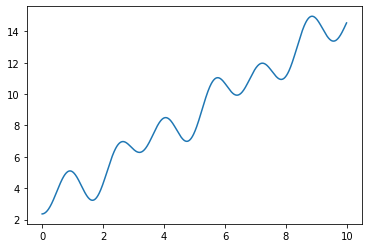

In [0]:
Y = m*x+b+A1*torch.sin(w1*x+c1)+A2*torch.sin(w2*x+c2)
plt.plot(x.detach().numpy(),Y.detach().numpy())

##Optimization in PyTorch

###Initialization

In [0]:
params = [0]*8
params[0] = m = Variable(torch.tensor(1.2,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2.8,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.6,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(2.2,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(pi/4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-1.0,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(4.0,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(pi/3,dtype=torch.double),requires_grad=True)
print(params[0])

tensor(1.2000, dtype=torch.float64, requires_grad=True)


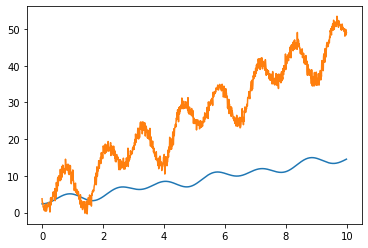

In [0]:
Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])
plt.plot(x.detach().numpy(),Y.detach().numpy())
plt.plot(x.detach().numpy(),y.detach().numpy())

###Computing the Loss and Gradients!

In [0]:
# Initialize

params = [0]*8
params[0] = m = Variable(torch.tensor(1.2,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2.8,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.6,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(2.2,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(pi/4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-1.0,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(4.0,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(pi/3,dtype=torch.double),requires_grad=True)


In [0]:
# Compute the function
Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])

# Compute the loss
loss = ((Y-y)*(Y-y))/2
loss = loss.sum()
print(loss)

# Zero out the gradients
for i in params:
  if i.grad!=None:
    i.grad.data=torch.tensor(0.0,dtype=torch.double)

# Compute Gradients
loss.backward()
for i in params:
  print(i.grad)

tensor(196364.5633, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(-111497.1224, dtype=torch.float64)
tensor(-16736.2388, dtype=torch.float64)
tensor(-408.1081, dtype=torch.float64)
tensor(5312.6167, dtype=torch.float64)
tensor(282.9996, dtype=torch.float64)
tensor(-1310.7501, dtype=torch.float64)
tensor(-5581.1849, dtype=torch.float64)
tensor(-884.6483, dtype=torch.float64)


###Updating the parameters

In [0]:
# Update Paramters
lr = 1e-5
for i in range(len(params)):
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)

for i in params:
  print(i)

tensor(2.3150, dtype=torch.float64, requires_grad=True)
tensor(2.9674, dtype=torch.float64, requires_grad=True)
tensor(0.6041, dtype=torch.float64, requires_grad=True)
tensor(2.1469, dtype=torch.float64, requires_grad=True)
tensor(0.7826, dtype=torch.float64, requires_grad=True)
tensor(-0.9869, dtype=torch.float64, requires_grad=True)
tensor(4.0558, dtype=torch.float64, requires_grad=True)
tensor(1.0560, dtype=torch.float64, requires_grad=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


##Complete Training Loop

Epoch:  0
Loss:  tensor(182906.6590, dtype=torch.float64, grad_fn=<SumBackward0>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


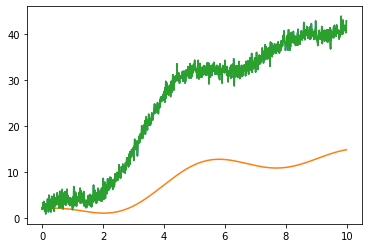

Epoch:  100
Loss:  tensor(3182.0727, dtype=torch.float64, grad_fn=<SumBackward0>)


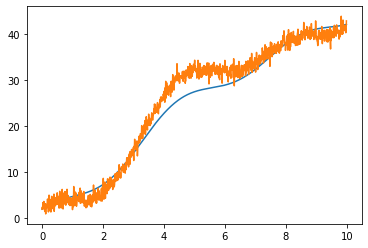

Epoch:  200
Loss:  tensor(2408.0749, dtype=torch.float64, grad_fn=<SumBackward0>)


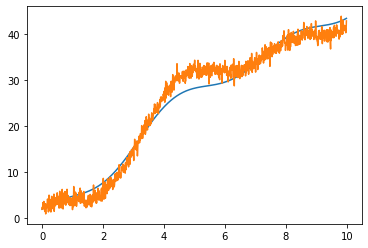

Epoch:  300
Loss:  tensor(2232.4047, dtype=torch.float64, grad_fn=<SumBackward0>)


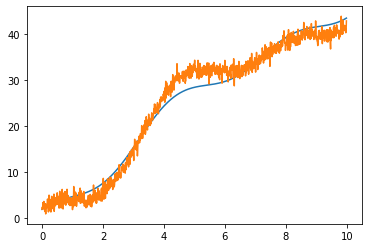

Epoch:  400
Loss:  tensor(2076.6808, dtype=torch.float64, grad_fn=<SumBackward0>)


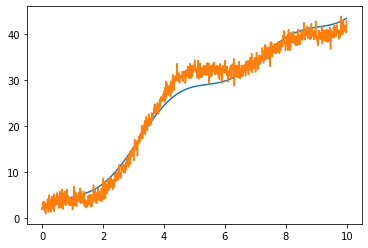

Epoch:  500
Loss:  tensor(1935.5343, dtype=torch.float64, grad_fn=<SumBackward0>)


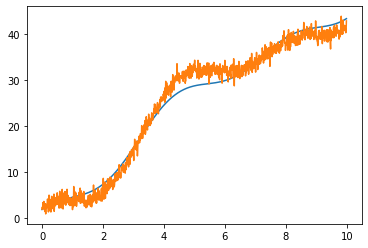

Epoch:  600
Loss:  tensor(1807.6761, dtype=torch.float64, grad_fn=<SumBackward0>)


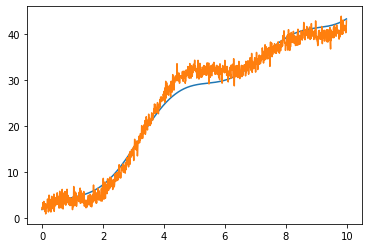

Epoch:  700
Loss:  tensor(1691.9114, dtype=torch.float64, grad_fn=<SumBackward0>)


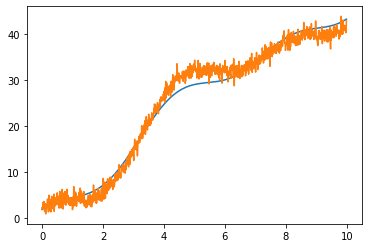

Epoch:  800
Loss:  tensor(1587.1242, dtype=torch.float64, grad_fn=<SumBackward0>)


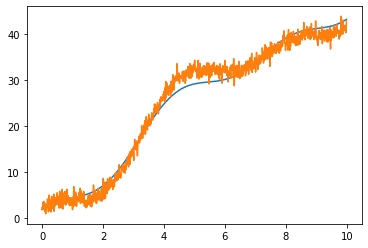

Epoch:  900
Loss:  tensor(1492.2820, dtype=torch.float64, grad_fn=<SumBackward0>)


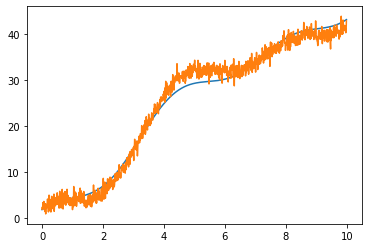

Epoch:  1000
Loss:  tensor(1406.4355, dtype=torch.float64, grad_fn=<SumBackward0>)


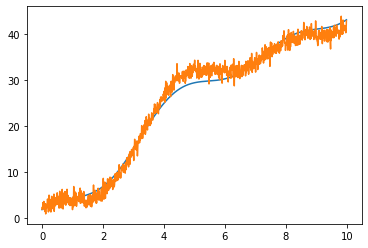

Epoch:  1100
Loss:  tensor(1328.7175, dtype=torch.float64, grad_fn=<SumBackward0>)


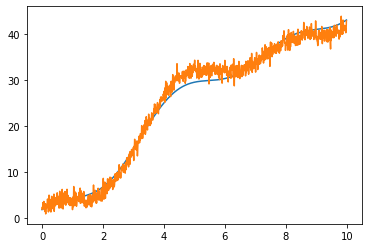

Epoch:  1200
Loss:  tensor(1258.3391, dtype=torch.float64, grad_fn=<SumBackward0>)


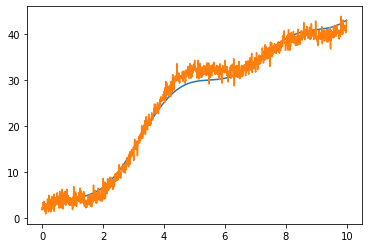

Epoch:  1300
Loss:  tensor(1194.5850, dtype=torch.float64, grad_fn=<SumBackward0>)


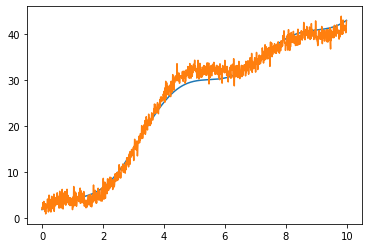

Epoch:  1400
Loss:  tensor(1136.8086, dtype=torch.float64, grad_fn=<SumBackward0>)


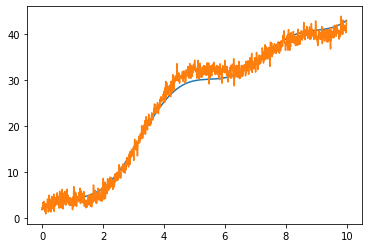

Epoch:  1500
Loss:  tensor(1084.4266, dtype=torch.float64, grad_fn=<SumBackward0>)


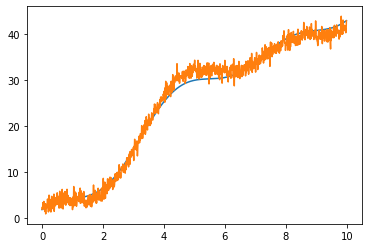

Epoch:  1600
Loss:  tensor(1036.9134, dtype=torch.float64, grad_fn=<SumBackward0>)


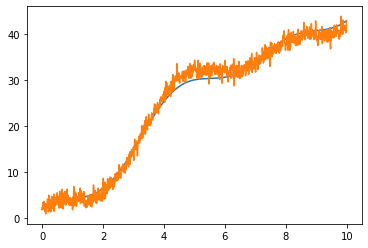

Epoch:  1700
Loss:  tensor(993.7958, dtype=torch.float64, grad_fn=<SumBackward0>)


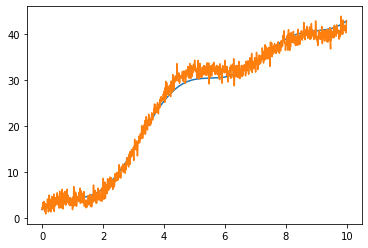

Epoch:  1800
Loss:  tensor(954.6483, dtype=torch.float64, grad_fn=<SumBackward0>)


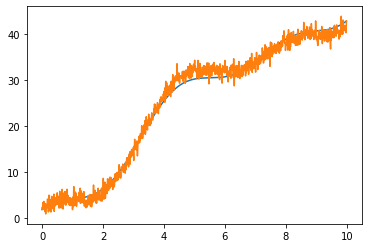

Epoch:  1900
Loss:  tensor(919.0881, dtype=torch.float64, grad_fn=<SumBackward0>)


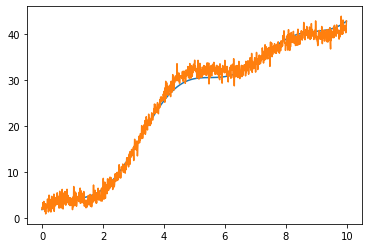

Epoch:  2000
Loss:  tensor(886.7711, dtype=torch.float64, grad_fn=<SumBackward0>)


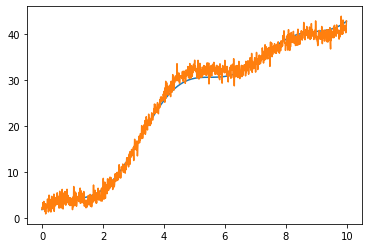

Epoch:  2100
Loss:  tensor(857.3876, dtype=torch.float64, grad_fn=<SumBackward0>)


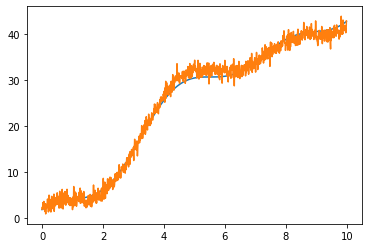

Epoch:  2200
Loss:  tensor(830.6590, dtype=torch.float64, grad_fn=<SumBackward0>)


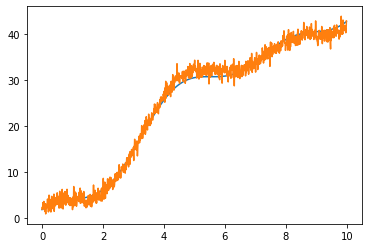

Epoch:  2300
Loss:  tensor(806.3343, dtype=torch.float64, grad_fn=<SumBackward0>)


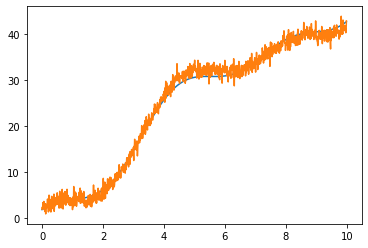

Epoch:  2400
Loss:  tensor(784.1876, dtype=torch.float64, grad_fn=<SumBackward0>)


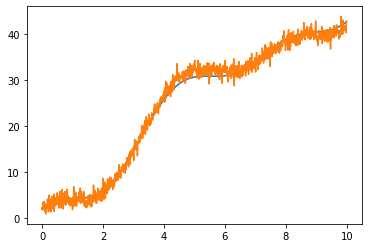

Epoch:  2500
Loss:  tensor(764.0152, dtype=torch.float64, grad_fn=<SumBackward0>)


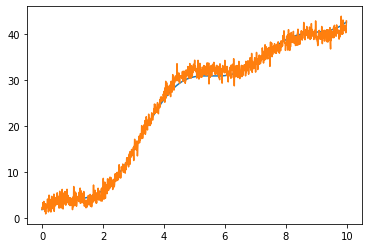

Epoch:  2600
Loss:  tensor(745.6331, dtype=torch.float64, grad_fn=<SumBackward0>)


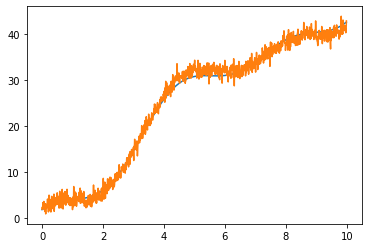

Epoch:  2700
Loss:  tensor(728.8754, dtype=torch.float64, grad_fn=<SumBackward0>)


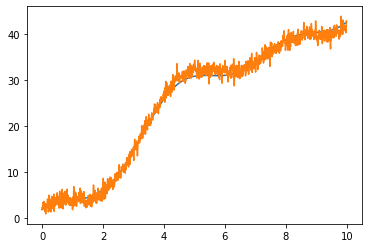

Epoch:  2800
Loss:  tensor(713.5923, dtype=torch.float64, grad_fn=<SumBackward0>)


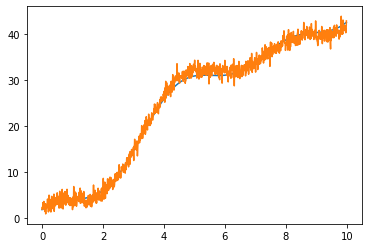

Epoch:  2900
Loss:  tensor(699.6481, dtype=torch.float64, grad_fn=<SumBackward0>)


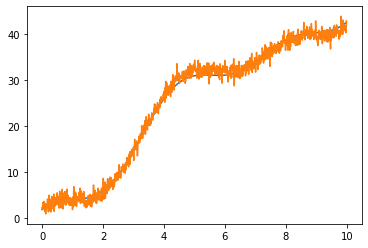

Epoch:  3000
Loss:  tensor(686.9204, dtype=torch.float64, grad_fn=<SumBackward0>)


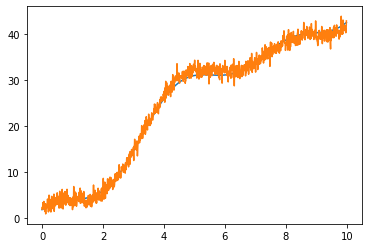

Epoch:  3100
Loss:  tensor(675.2981, dtype=torch.float64, grad_fn=<SumBackward0>)


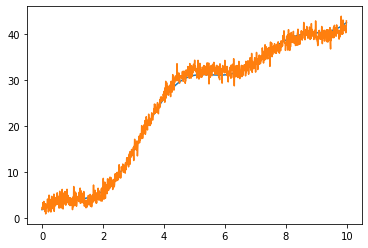

Epoch:  3200
Loss:  tensor(664.6808, dtype=torch.float64, grad_fn=<SumBackward0>)


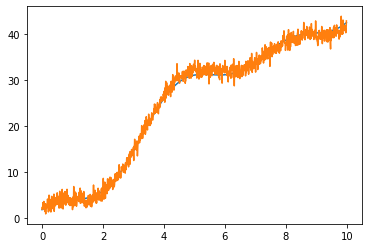

Epoch:  3300
Loss:  tensor(654.9775, dtype=torch.float64, grad_fn=<SumBackward0>)


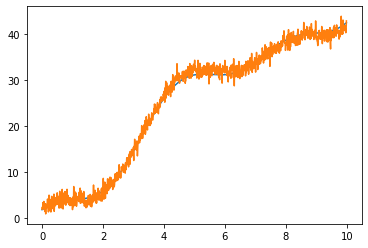

Epoch:  3400
Loss:  tensor(646.1055, dtype=torch.float64, grad_fn=<SumBackward0>)


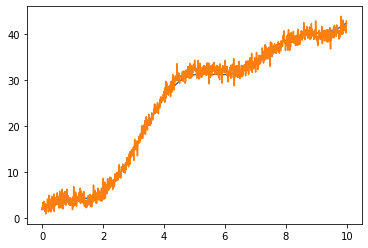

Epoch:  3500
Loss:  tensor(637.9902, dtype=torch.float64, grad_fn=<SumBackward0>)


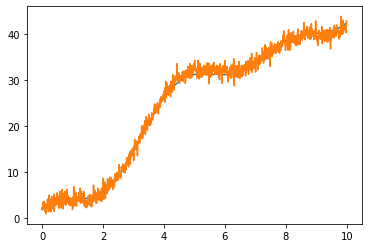

Epoch:  3600
Loss:  tensor(630.5636, dtype=torch.float64, grad_fn=<SumBackward0>)


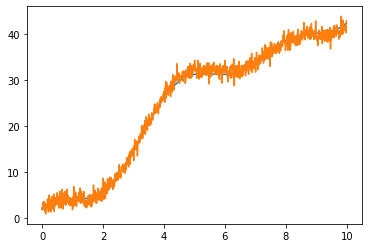

Epoch:  3700
Loss:  tensor(623.7640, dtype=torch.float64, grad_fn=<SumBackward0>)


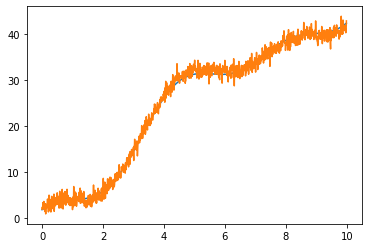

Epoch:  3800
Loss:  tensor(617.5356, dtype=torch.float64, grad_fn=<SumBackward0>)


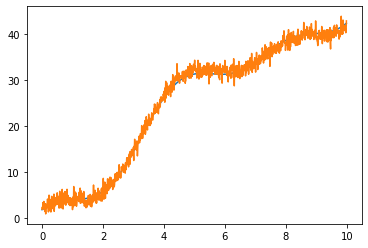

Epoch:  3900
Loss:  tensor(611.8274, dtype=torch.float64, grad_fn=<SumBackward0>)


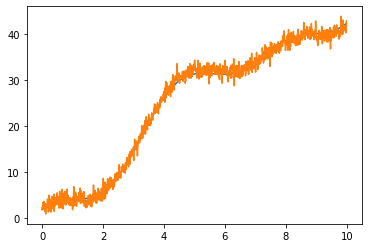

Epoch:  4000
Loss:  tensor(606.5934, dtype=torch.float64, grad_fn=<SumBackward0>)


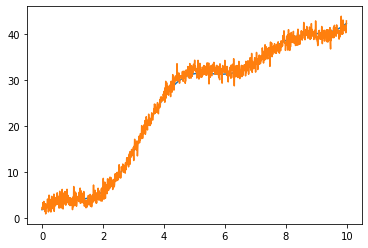

Epoch:  4100
Loss:  tensor(601.7917, dtype=torch.float64, grad_fn=<SumBackward0>)


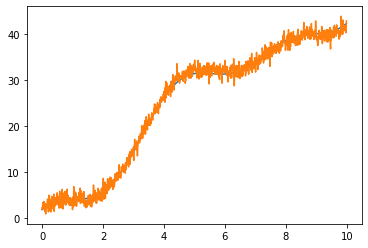

Epoch:  4200
Loss:  tensor(597.3840, dtype=torch.float64, grad_fn=<SumBackward0>)


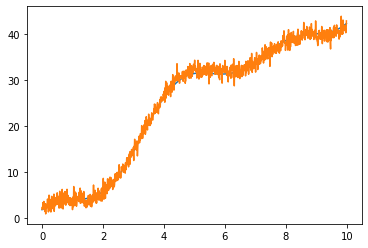

Epoch:  4300
Loss:  tensor(593.3357, dtype=torch.float64, grad_fn=<SumBackward0>)


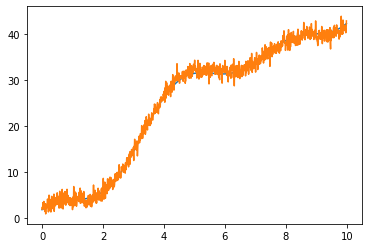

Epoch:  4400
Loss:  tensor(589.6154, dtype=torch.float64, grad_fn=<SumBackward0>)


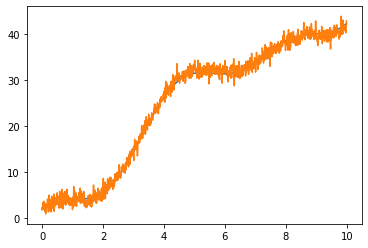

Epoch:  4500
Loss:  tensor(586.1942, dtype=torch.float64, grad_fn=<SumBackward0>)


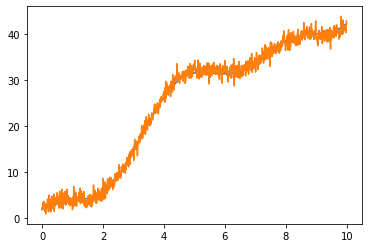

Epoch:  4600
Loss:  tensor(583.0463, dtype=torch.float64, grad_fn=<SumBackward0>)


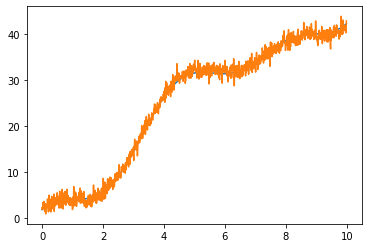

Epoch:  4700
Loss:  tensor(580.1477, dtype=torch.float64, grad_fn=<SumBackward0>)


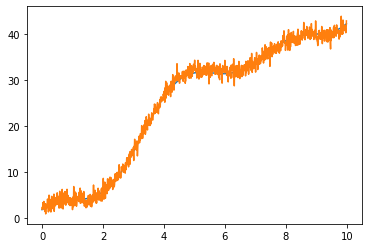

Epoch:  4800
Loss:  tensor(577.4770, dtype=torch.float64, grad_fn=<SumBackward0>)


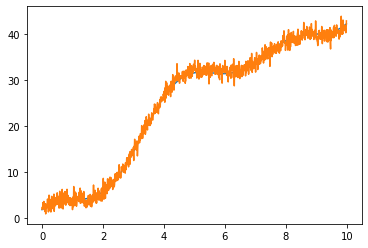

Epoch:  4900
Loss:  tensor(575.0145, dtype=torch.float64, grad_fn=<SumBackward0>)


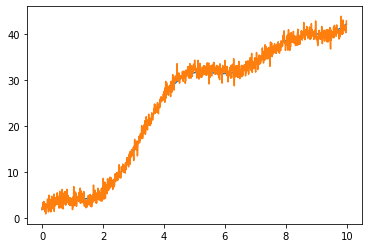

Epoch:  5000
Loss:  tensor(572.7422, dtype=torch.float64, grad_fn=<SumBackward0>)


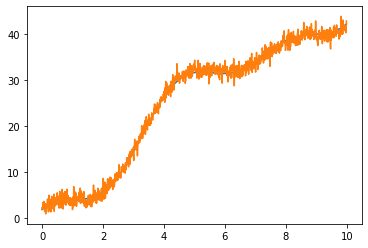

Epoch:  5100
Loss:  tensor(570.6439, dtype=torch.float64, grad_fn=<SumBackward0>)


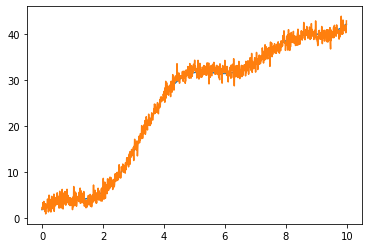

Epoch:  5200
Loss:  tensor(568.7047, dtype=torch.float64, grad_fn=<SumBackward0>)


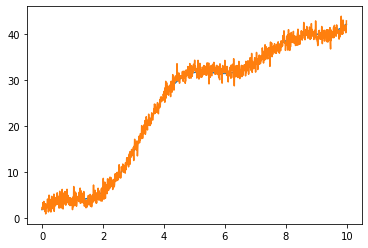

Epoch:  5300
Loss:  tensor(566.9111, dtype=torch.float64, grad_fn=<SumBackward0>)


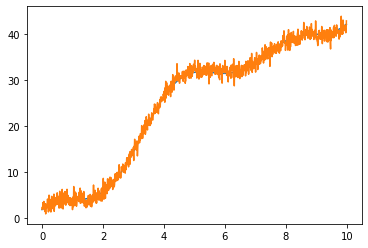

Epoch:  5400
Loss:  tensor(565.2508, dtype=torch.float64, grad_fn=<SumBackward0>)


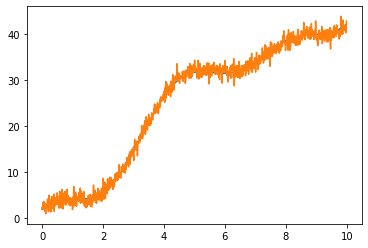

Epoch:  5500
Loss:  tensor(563.7125, dtype=torch.float64, grad_fn=<SumBackward0>)


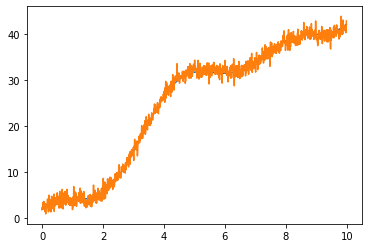

Epoch:  5600
Loss:  tensor(562.2860, dtype=torch.float64, grad_fn=<SumBackward0>)


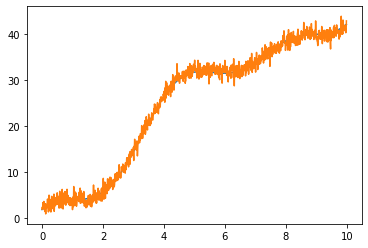

Epoch:  5700
Loss:  tensor(560.9620, dtype=torch.float64, grad_fn=<SumBackward0>)


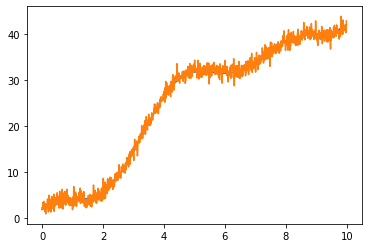

Epoch:  5800
Loss:  tensor(559.7319, dtype=torch.float64, grad_fn=<SumBackward0>)


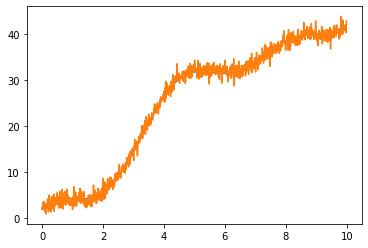

Epoch:  5900
Loss:  tensor(558.5880, dtype=torch.float64, grad_fn=<SumBackward0>)


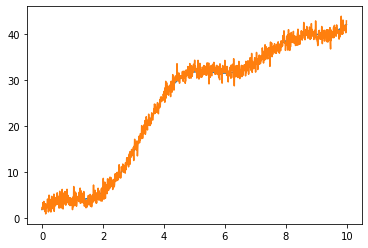

Epoch:  6000
Loss:  tensor(557.5233, dtype=torch.float64, grad_fn=<SumBackward0>)


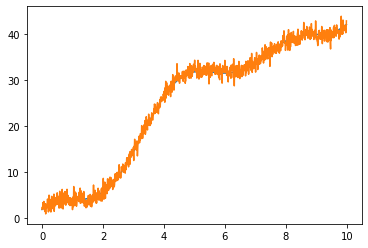

Epoch:  6100
Loss:  tensor(556.5311, dtype=torch.float64, grad_fn=<SumBackward0>)


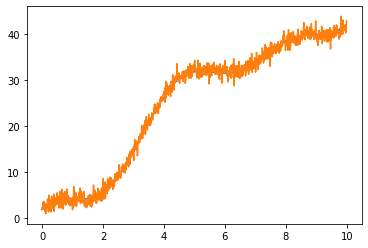

Epoch:  6200
Loss:  tensor(555.6057, dtype=torch.float64, grad_fn=<SumBackward0>)


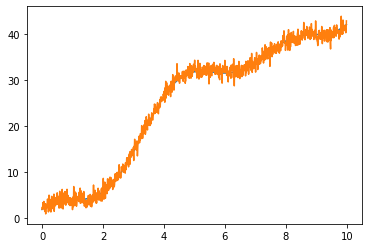

Epoch:  6300
Loss:  tensor(554.7417, dtype=torch.float64, grad_fn=<SumBackward0>)


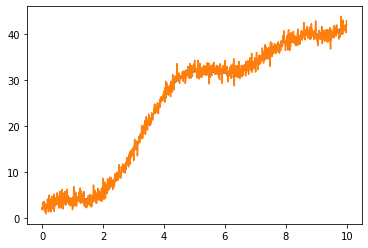

Epoch:  6400
Loss:  tensor(553.9341, dtype=torch.float64, grad_fn=<SumBackward0>)


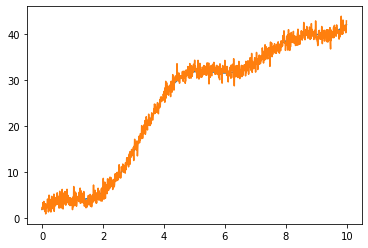

Epoch:  6500
Loss:  tensor(553.1784, dtype=torch.float64, grad_fn=<SumBackward0>)


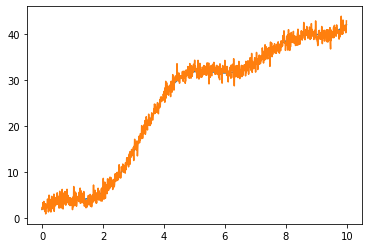

Epoch:  6600
Loss:  tensor(552.4706, dtype=torch.float64, grad_fn=<SumBackward0>)


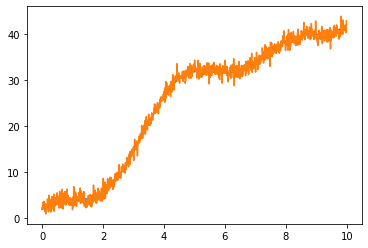

Epoch:  6700
Loss:  tensor(551.8068, dtype=torch.float64, grad_fn=<SumBackward0>)


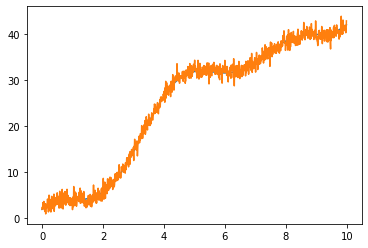

Epoch:  6800
Loss:  tensor(551.1837, dtype=torch.float64, grad_fn=<SumBackward0>)


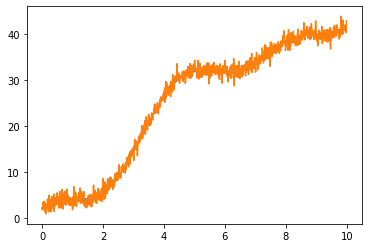

Epoch:  6900
Loss:  tensor(550.5981, dtype=torch.float64, grad_fn=<SumBackward0>)


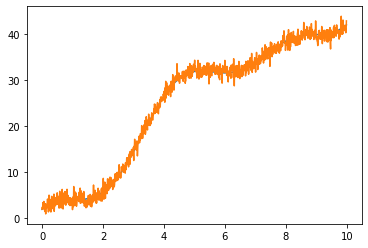

Epoch:  7000
Loss:  tensor(550.0472, dtype=torch.float64, grad_fn=<SumBackward0>)


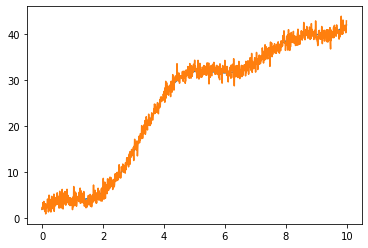

Epoch:  7100
Loss:  tensor(549.5282, dtype=torch.float64, grad_fn=<SumBackward0>)


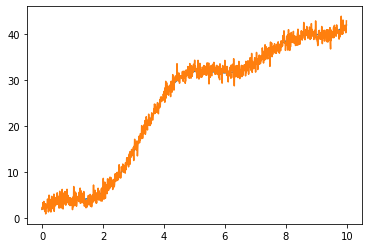

Epoch:  7200
Loss:  tensor(549.0389, dtype=torch.float64, grad_fn=<SumBackward0>)


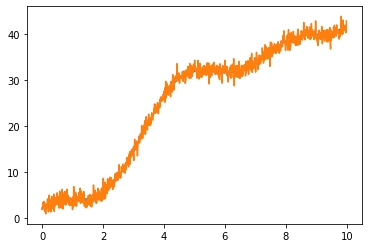

Epoch:  7300
Loss:  tensor(548.5770, dtype=torch.float64, grad_fn=<SumBackward0>)


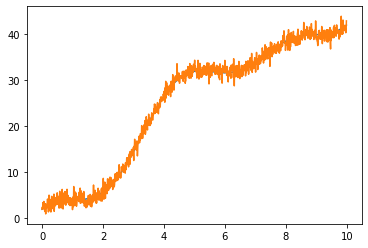

Epoch:  7400
Loss:  tensor(548.1405, dtype=torch.float64, grad_fn=<SumBackward0>)


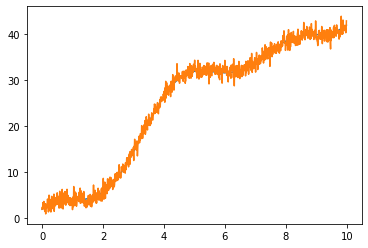

Epoch:  7500
Loss:  tensor(547.7275, dtype=torch.float64, grad_fn=<SumBackward0>)


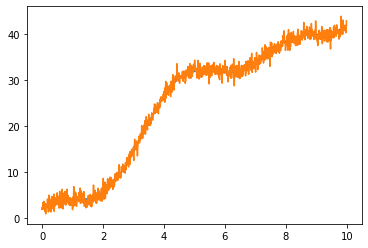

Epoch:  7600
Loss:  tensor(547.3363, dtype=torch.float64, grad_fn=<SumBackward0>)


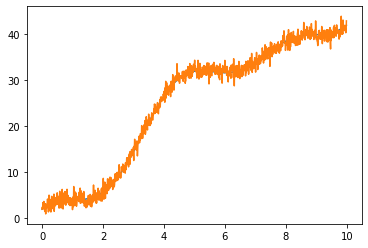

Epoch:  7700
Loss:  tensor(546.9655, dtype=torch.float64, grad_fn=<SumBackward0>)


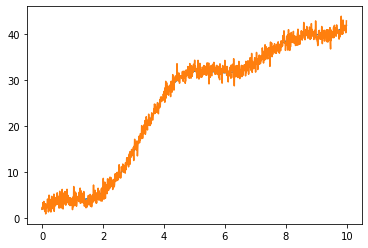

Epoch:  7800
Loss:  tensor(546.6135, dtype=torch.float64, grad_fn=<SumBackward0>)


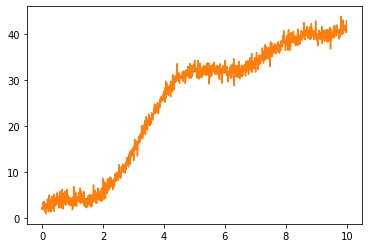

Epoch:  7900
Loss:  tensor(546.2791, dtype=torch.float64, grad_fn=<SumBackward0>)


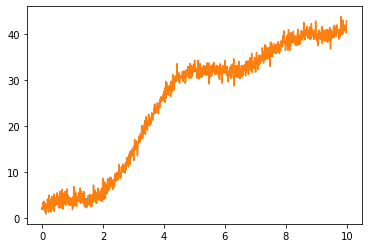

Epoch:  8000
Loss:  tensor(545.9610, dtype=torch.float64, grad_fn=<SumBackward0>)


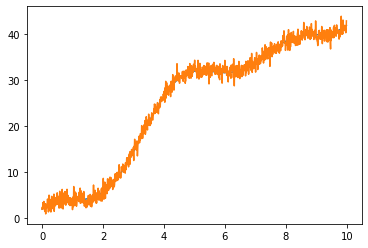

Epoch:  8100
Loss:  tensor(545.6581, dtype=torch.float64, grad_fn=<SumBackward0>)


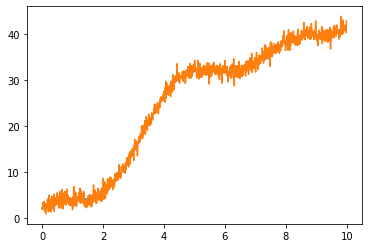

Epoch:  8200
Loss:  tensor(545.3695, dtype=torch.float64, grad_fn=<SumBackward0>)


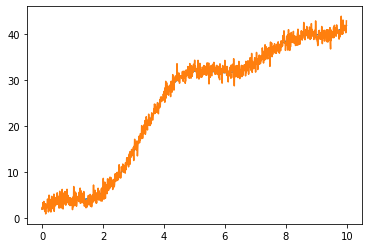

Epoch:  8300
Loss:  tensor(545.0942, dtype=torch.float64, grad_fn=<SumBackward0>)


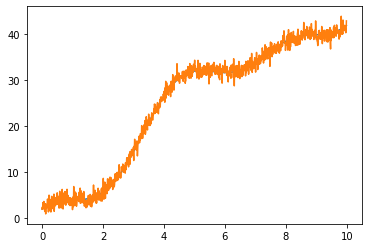

Epoch:  8400
Loss:  tensor(544.8313, dtype=torch.float64, grad_fn=<SumBackward0>)


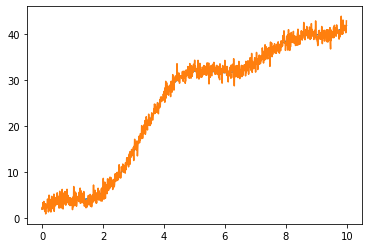

Epoch:  8500
Loss:  tensor(544.5801, dtype=torch.float64, grad_fn=<SumBackward0>)


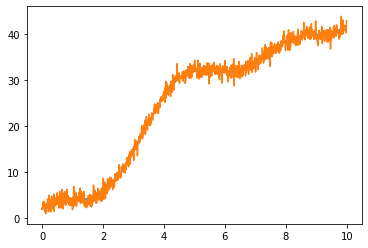

Epoch:  8600
Loss:  tensor(544.3397, dtype=torch.float64, grad_fn=<SumBackward0>)


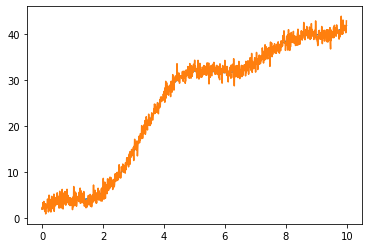

Epoch:  8700
Loss:  tensor(544.1096, dtype=torch.float64, grad_fn=<SumBackward0>)


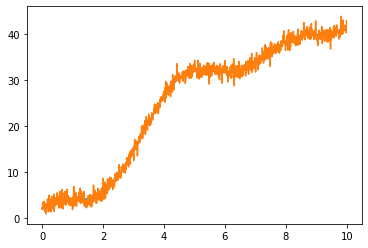

Epoch:  8800
Loss:  tensor(543.8891, dtype=torch.float64, grad_fn=<SumBackward0>)


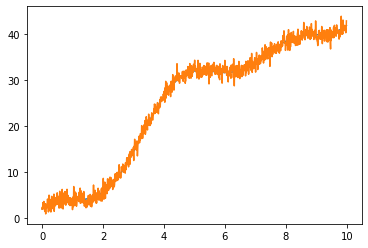

Epoch:  8900
Loss:  tensor(543.6776, dtype=torch.float64, grad_fn=<SumBackward0>)


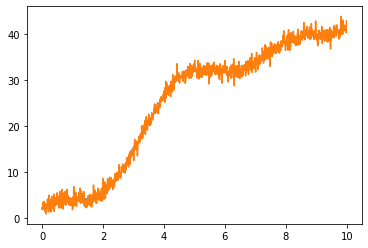

Epoch:  9000
Loss:  tensor(543.4746, dtype=torch.float64, grad_fn=<SumBackward0>)


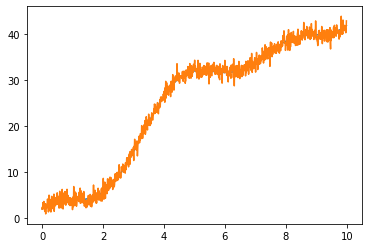

Epoch:  9100
Loss:  tensor(543.2796, dtype=torch.float64, grad_fn=<SumBackward0>)


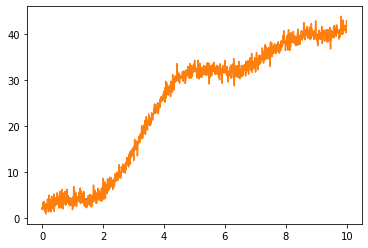

Epoch:  9200
Loss:  tensor(543.0922, dtype=torch.float64, grad_fn=<SumBackward0>)


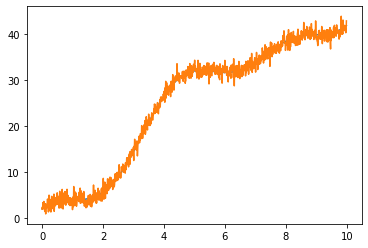

Epoch:  9300
Loss:  tensor(542.9119, dtype=torch.float64, grad_fn=<SumBackward0>)


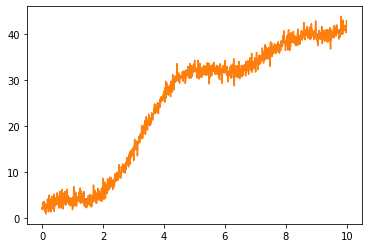

Epoch:  9400
Loss:  tensor(542.7384, dtype=torch.float64, grad_fn=<SumBackward0>)


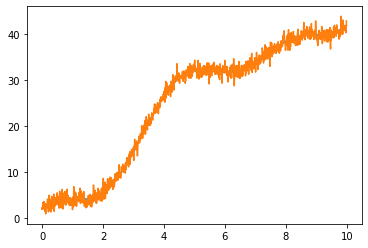

Epoch:  9500
Loss:  tensor(542.5712, dtype=torch.float64, grad_fn=<SumBackward0>)


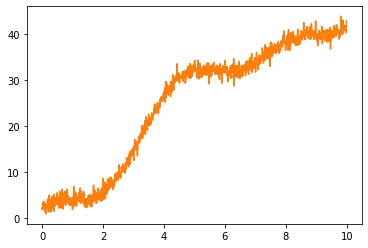

Epoch:  9600
Loss:  tensor(542.4101, dtype=torch.float64, grad_fn=<SumBackward0>)


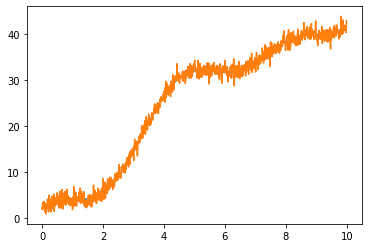

Epoch:  9700
Loss:  tensor(542.2547, dtype=torch.float64, grad_fn=<SumBackward0>)


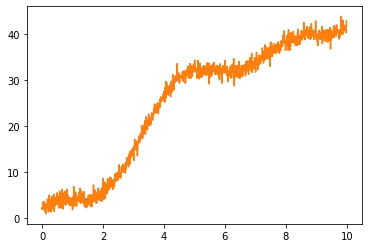

Epoch:  9800
Loss:  tensor(542.1048, dtype=torch.float64, grad_fn=<SumBackward0>)


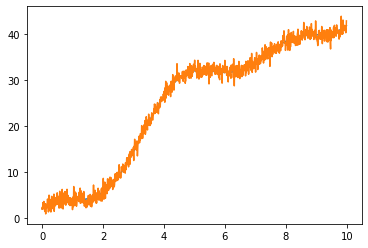

Epoch:  9900
Loss:  tensor(541.9600, dtype=torch.float64, grad_fn=<SumBackward0>)


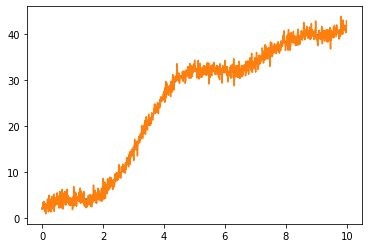

Epoch:  10000
Loss:  tensor(541.8201, dtype=torch.float64, grad_fn=<SumBackward0>)


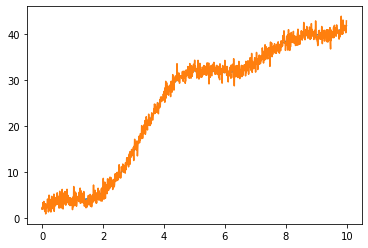

tensor(4.5445, dtype=torch.float64, requires_grad=True)
tensor(2.7930, dtype=torch.float64, requires_grad=True)
tensor(2.7573, dtype=torch.float64, requires_grad=True)
tensor(1.5912, dtype=torch.float64, requires_grad=True)
tensor(0.9565, dtype=torch.float64, requires_grad=True)
tensor(-5.1132, dtype=torch.float64, requires_grad=True)
tensor(0.7912, dtype=torch.float64, requires_grad=True)
tensor(0.6463, dtype=torch.float64, requires_grad=True)


In [0]:
losses = []

x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin( 0.5 * pi * x + pi/3) - 5.2 * np.sin(0.25 * pi * x + pi/5) + np.random.normal(size=1000)

plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*8
params[0] = m = Variable(torch.tensor(1.3,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(1.5,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(2,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.4*pi,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(1.2*pi/3,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-2.2,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(0.2*pi,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(1.3*pi/5,dtype=torch.double),requires_grad=True)

lr = 1e-6

for epoch in range(10001):
  
  # Learning Rate Scheduling
  # lr = lr*0.995
  
  # Compute the function
  Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])

  # Compute the loss
  loss = ((Y-y)*(Y-y))/2
  loss = loss.sum()

  # Zero out the gradients
  for i in params:
    if i.grad!=None:
      i.grad.data=torch.tensor(0.0,dtype=torch.double)

  # Compute Gradients
  loss.backward()
  # for i in params:
    # print(i.grad)
  
  losses.append(loss.detach().numpy())
    
  # Update Parameters
  for i in range(len(params)):
    params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)
  
  if epoch%100==0:
    print('Epoch: ',epoch)
    print("Loss: ",loss)
    plt.plot(x.detach().numpy(),Y.detach().numpy())
    plt.plot(x.detach().numpy(),y.detach().numpy())
    plt.show()
    
for i in params:
  print(i)

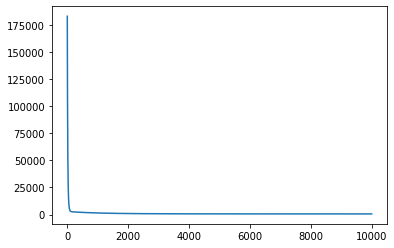

In [0]:
losses = np.array(losses)
plt.plot(losses)

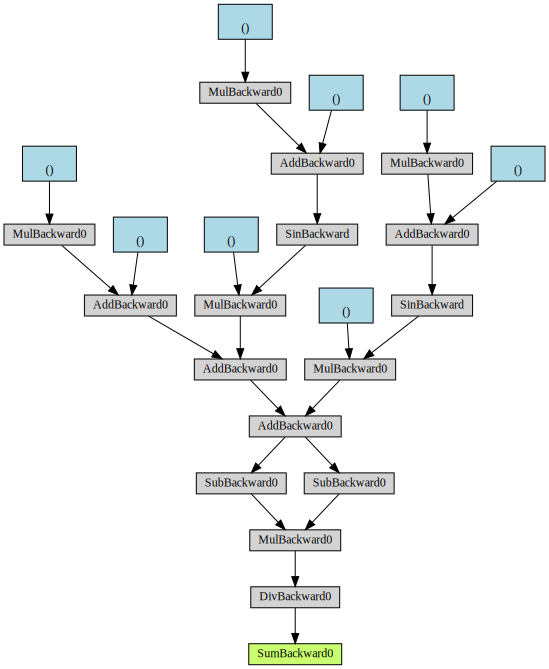

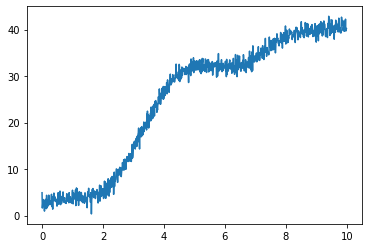

In [0]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace

x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin( 0.5 * pi * x + pi/3) - 5.2 * np.sin(0.25 * pi * x + pi/5) + np.random.normal(size=1000)


plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*8
params[0] = m = Variable(torch.tensor(1.2,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(0,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(2.7,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.45*pi,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(1.1*pi/3,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-5.0,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(0.23*pi,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(0.9*pi/5,dtype=torch.double),requires_grad=True)

# Compute the function
Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])

# Compute the loss
loss = ((Y-y)*(Y-y))/2
loss = loss.sum()

make_dot(loss)